In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## EDA:

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
#Dropping columns other than v1 and v2
df = df[['v1','v2']]

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
#Statistical summary of dataset
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.shape

(5572, 2)

#### We have 5572 data rows and 2 columns in the training dataframe.

### Checking Null values in Training Dataframe:

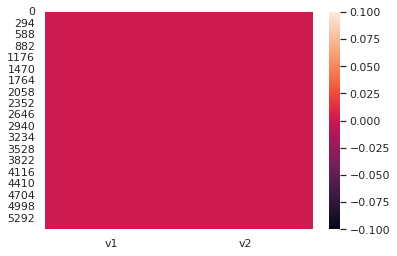

In [8]:
#Checking null values using heatmap
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df.isnull())
plt.show()

In [9]:
#Total number of null values in complete dataset
df.isnull().sum().sum()

0

In [10]:
#number of null values in each column
df.isnull().sum()

v1    0
v2    0
dtype: int64

**As we can see there are no NULL values in train dataset**

### Encoding (Converting String to numeric):

In [11]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [12]:
df['v1'] = enc.fit_transform(df['v1'].values.reshape(-1,1))

In [13]:
df

,v1,v2
0,0.0,"Go until jurong point, crazy.. Available only ..."
1,0.0,Ok lar... Joking wif u oni...
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.0,U dun say so early hor... U c already then say...
4,0.0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1.0,This is the 2nd time we have tried 2 contact u...
5568,0.0,Will Ì_ b going to esplanade fr home?
5569,0.0,"Pity, * was in mood for that. So...any other s..."
5570,0.0,The guy did some bitching but I acted like i'd...


## Cleaning Raw Data And Tokenizing it

### 1. Lowering Case

In [14]:
def to_lower(word):
    result = word.lower()
    return result

In [15]:
#applying the function
df['v2']= df['v2'].apply(lambda x:to_lower(x))

In [16]:
df

,v1,v2
0,0.0,"go until jurong point, crazy.. available only ..."
1,0.0,ok lar... joking wif u oni...
2,1.0,free entry in 2 a wkly comp to win fa cup fina...
3,0.0,u dun say so early hor... u c already then say...
4,0.0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1.0,this is the 2nd time we have tried 2 contact u...
5568,0.0,will ì_ b going to esplanade fr home?
5569,0.0,"pity, * was in mood for that. so...any other s..."
5570,0.0,the guy did some bitching but i acted like i'd...


### 2. Removal of special characters

In [17]:
import string
def remove_special_characters(word):
    result=word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

In [18]:
#applying the function
df['v2']= df['v2'].apply(lambda x:remove_special_characters(x))

In [19]:
df

,v1,v2
0,0.0,go until jurong point crazy available only in ...
1,0.0,ok lar joking wif u oni
2,1.0,free entry in 2 a wkly comp to win fa cup fina...
3,0.0,u dun say so early hor u c already then say
4,0.0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1.0,this is the 2nd time we have tried 2 contact u...
5568,0.0,will ì b going to esplanade fr home
5569,0.0,pity was in mood for that soany other suggest...
5570,0.0,the guy did some bitching but i acted like id ...


### 3. Tokenizing the Cleaned Data

In [20]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens
#applying function to the column
df['v2']= df['v2'].apply(lambda x: tokenization(x))

In [21]:
df

,v1,v2
0,0.0,"[go, until, jurong, point, crazy, available, o..."
1,0.0,"[ok, lar, joking, wif, u, oni]"
2,1.0,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0.0,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0.0,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...
5567,1.0,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,0.0,"[will, ì, b, going, to, esplanade, fr, home]"
5569,0.0,"[pity, was, in, mood, for, that, soany, other,..."
5570,0.0,"[the, guy, did, some, bitching, but, i, acted,..."


### 4. Removal of stop words

In [22]:
#importing nlp library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/dell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stop_words(words):
    result = [i for i in words if i not in stopwords]
    return result

In [24]:
#applying the function
df['v2']= df['v2'].apply(lambda x:remove_stop_words(x))

In [25]:
df

,v1,v2
0,0.0,"[go, jurong, point, crazy, available, bugis, n..."
1,0.0,"[ok, lar, joking, wif, u, oni]"
2,1.0,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0.0,"[u, dun, say, early, hor, u, c, already, say]"
4,0.0,"[nah, dont, think, goes, usf, lives, around, t..."
...,...,...
5567,1.0,"[2nd, time, tried, 2, contact, u, u, å, 750, p..."
5568,0.0,"[ì, b, going, esplanade, fr, home]"
5569,0.0,"[pity, mood, soany, suggestions]"
5570,0.0,"[guy, bitching, acted, like, id, interested, b..."


### Countplot for spam / ham :

In [26]:
df

,v1,v2
0,0.0,"[go, jurong, point, crazy, available, bugis, n..."
1,0.0,"[ok, lar, joking, wif, u, oni]"
2,1.0,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0.0,"[u, dun, say, early, hor, u, c, already, say]"
4,0.0,"[nah, dont, think, goes, usf, lives, around, t..."
...,...,...
5567,1.0,"[2nd, time, tried, 2, contact, u, u, å, 750, p..."
5568,0.0,"[ì, b, going, esplanade, fr, home]"
5569,0.0,"[pity, mood, soany, suggestions]"
5570,0.0,"[guy, bitching, acted, like, id, interested, b..."


0.0    4825
1.0     747
Name: v1, dtype: int64


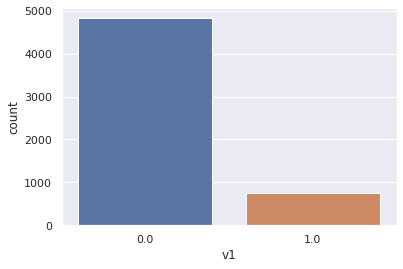

In [27]:
ax = sns.countplot(x='v1',data=df)
print(df['v1'].value_counts())

**As we can see input data is imbablanced**

### Lemmatization

In [28]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [29]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['v2']=df['v2'].apply(lambda x:lemmatizer(x))

In [30]:
df = df.reset_index()
df = df.drop('index',axis=1)

In [31]:
df

,v1,v2
0,0.0,"[go, jurong, point, crazy, available, bugis, n..."
1,0.0,"[ok, lar, joking, wif, u, oni]"
2,1.0,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0.0,"[u, dun, say, early, hor, u, c, already, say]"
4,0.0,"[nah, dont, think, go, usf, life, around, though]"
...,...,...
5567,1.0,"[2nd, time, tried, 2, contact, u, u, å, 750, p..."
5568,0.0,"[ì, b, going, esplanade, fr, home]"
5569,0.0,"[pity, mood, soany, suggestion]"
5570,0.0,"[guy, bitching, acted, like, id, interested, b..."


In [32]:
df1 = df.copy()
df1 = df1.drop('v1', axis=1)
df1

,v2
0,"[go, jurong, point, crazy, available, bugis, n..."
1,"[ok, lar, joking, wif, u, oni]"
2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,"[u, dun, say, early, hor, u, c, already, say]"
4,"[nah, dont, think, go, usf, life, around, though]"
...,...
5567,"[2nd, time, tried, 2, contact, u, u, å, 750, p..."
5568,"[ì, b, going, esplanade, fr, home]"
5569,"[pity, mood, soany, suggestion]"
5570,"[guy, bitching, acted, like, id, interested, b..."


### Bag of words:

In [33]:
# Counting occurence of each word
import collections
word2count = collections.Counter([y for x in df1.values.flatten() for y in x])
word2count

Counter({'go': 304,
         'jurong': 1,
         'point': 33,
         'crazy': 15,
         'available': 16,
         'bugis': 7,
         'n': 144,
         'great': 111,
         'world': 36,
         'la': 7,
         'e': 84,
         'buffet': 2,
         'cine': 7,
         'got': 238,
         'amore': 1,
         'wat': 96,
         'ok': 277,
         'lar': 38,
         'joking': 6,
         'wif': 27,
         'u': 1183,
         'oni': 4,
         'free': 275,
         'entry': 26,
         '2': 478,
         'wkly': 14,
         'comp': 11,
         'win': 76,
         'fa': 4,
         'cup': 8,
         'final': 18,
         'tkts': 4,
         '21st': 3,
         'may': 46,
         '2005': 3,
         'text': 214,
         '87121': 4,
         'receive': 38,
         'questionstd': 2,
         'txt': 163,
         'ratetcs': 2,
         'apply': 31,
         '08452810075over18s': 2,
         'dun': 55,
         'say': 118,
         'early': 33,
         'hor': 2,
  

In [34]:
# Frequent words
import heapq
freq_words = heapq.nlargest(5000, word2count, key=word2count.get)
freq_words

['u',
 'call',
 '2',
 'im',
 '',
 'get',
 'ur',
 'go',
 'å',
 '4',
 'dont',
 'ok',
 'ltgt',
 'free',
 'know',
 'come',
 'like',
 'day',
 'got',
 'ill',
 'good',
 'time',
 'text',
 'want',
 'love',
 'send',
 'need',
 'one',
 'going',
 'today',
 'txt',
 'r',
 'home',
 'lor',
 'see',
 'sorry',
 'still',
 'stop',
 'back',
 'mobile',
 'think',
 'reply',
 'n',
 'take',
 'tell',
 'phone',
 'new',
 'week',
 'later',
 'well',
 'da',
 'hi',
 'please',
 'make',
 'cant',
 'ì',
 'say',
 'night',
 'claim',
 'thing',
 'much',
 'oh',
 'great',
 'hey',
 'dear',
 'pls',
 'number',
 'happy',
 'friend',
 'work',
 'hope',
 'give',
 'message',
 'way',
 'wat',
 'prize',
 'right',
 'thats',
 'msg',
 'c',
 'let',
 'already',
 'tomorrow',
 'ask',
 '1',
 'yes',
 'really',
 'yeah',
 'said',
 'min',
 'e',
 'babe',
 'co',
 'amp',
 'life',
 'meet',
 'didnt',
 'morning',
 'last',
 'miss',
 'service',
 'win',
 'would',
 'year',
 'ive',
 'cash',
 'thanks',
 'find',
 'feel',
 'lol',
 'anything',
 'tone',
 '3',
 'every',

In [35]:
X = []
for i in range(0,4457) :
    vector = []
    for word in freq_words:
        if word in df1.v2[i]:
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)
X = np.asarray(X)

In [36]:
df3 = pd.DataFrame(X, columns=[freq_words])
df3

,u,call,2,im,,get,ur,go,å,4,...,hen,smoked,sfirst,timedhoni,teju,hourish,nothis,groundamla,convenience,evaluation
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4453,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4454,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df3.insert(5000,'v1',df.v1)

In [38]:
df3

,u,call,2,im,,get,ur,go,å,4,...,smoked,sfirst,timedhoni,teju,hourish,nothis,groundamla,convenience,evaluation,v1
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4453,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4454,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [39]:
df3.dtypes

u                int64
call             int64
2                int64
im               int64
                 int64
                ...   
nothis           int64
groundamla       int64
convenience      int64
evaluation       int64
v1             float64
Length: 5001, dtype: object

**As we can see all columns are numeric datatype**

### Density plots :

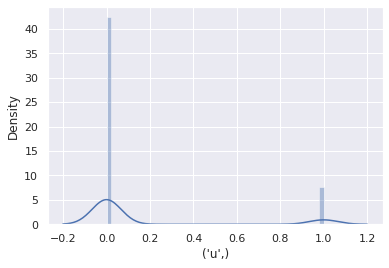



*****************************************************************************************************




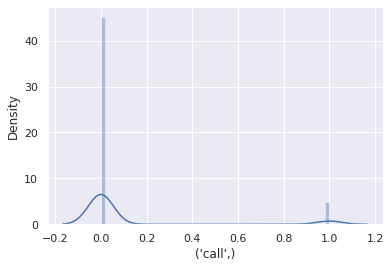



*****************************************************************************************************




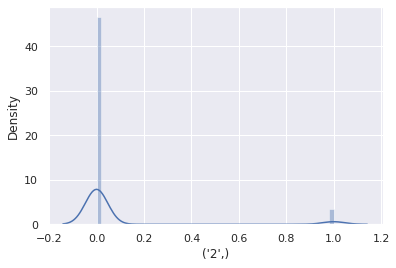



*****************************************************************************************************




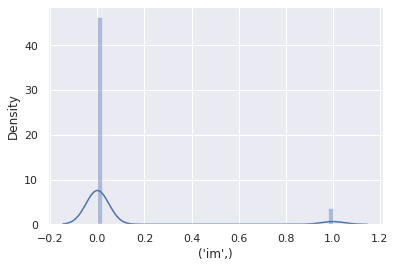



*****************************************************************************************************




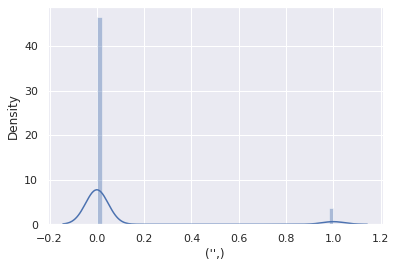



*****************************************************************************************************




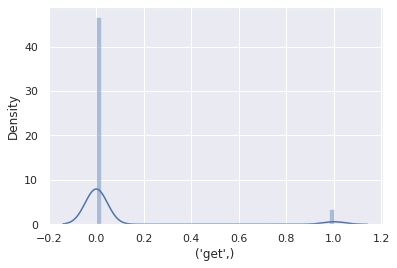



*****************************************************************************************************




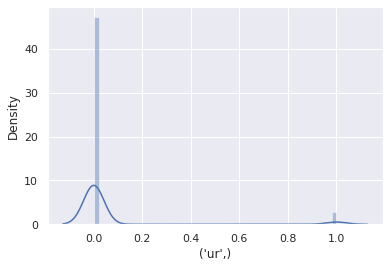



*****************************************************************************************************




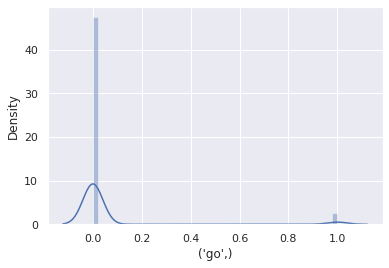



*****************************************************************************************************




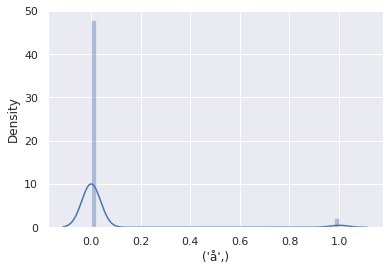



*****************************************************************************************************




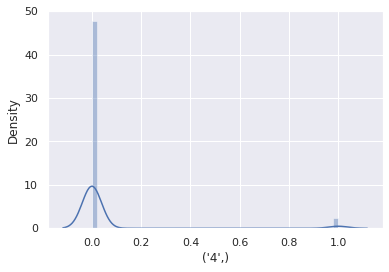



*****************************************************************************************************




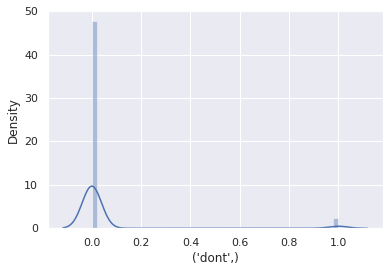



*****************************************************************************************************




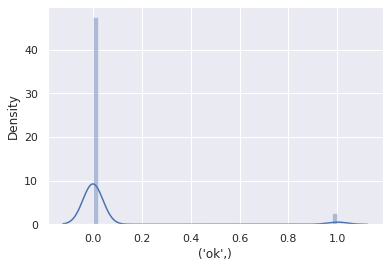



*****************************************************************************************************




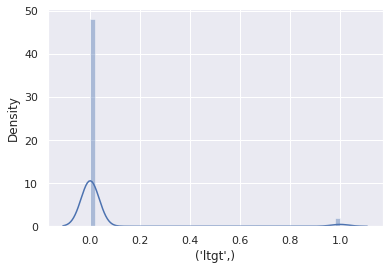



*****************************************************************************************************




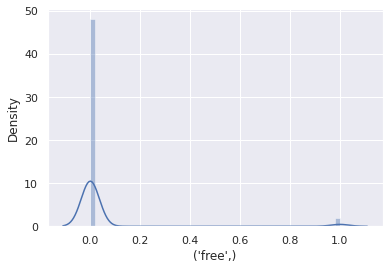



*****************************************************************************************************




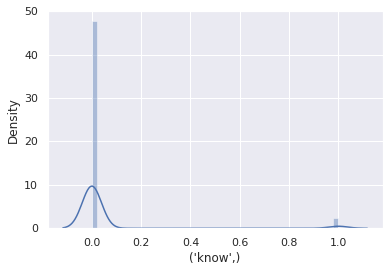



*****************************************************************************************************




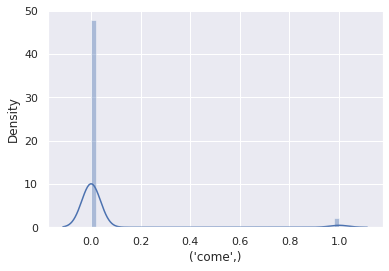



*****************************************************************************************************




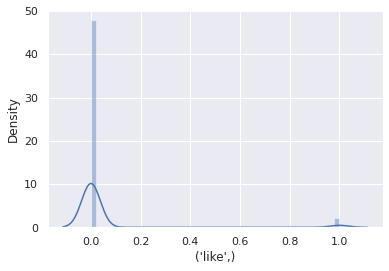



*****************************************************************************************************




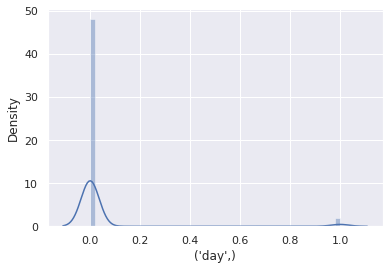



*****************************************************************************************************




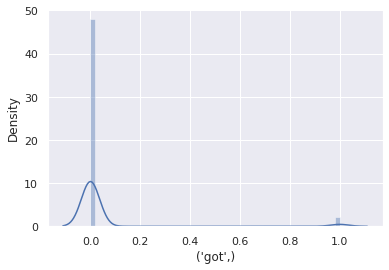



*****************************************************************************************************




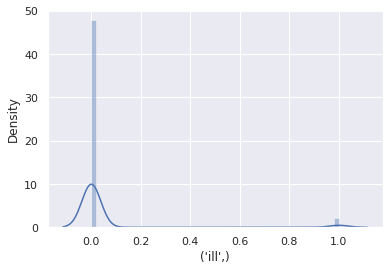



*****************************************************************************************************




In [40]:
for i in df3.columns[0:20]:
    if df3[i].dtypes != "object":
        sns.set(rc={'figure.figsize':(6,4)})
        sns.distplot(df3[i])
        plt.show()
        print('\n')
        print('*****************************************************************************************************')
        print('\n')

**From above density plots we can see the different number occurences for different words**

### Separating the columns into features and target :

In [41]:
feature = df3.drop(['v1'],axis=1)
target = df3['v1']

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = 0)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [46]:
from sklearn.metrics import roc_curve

def model_selection(algorithm_instance,features_train,target_train,features_test,target_test):
    algorithm_instance.fit(features_train,target_train)
    model_1_pred_train = algorithm_instance.predict(features_train)
    model_1_pred_test = algorithm_instance.predict(features_test)
    print("Accuracy for the training model : ",accuracy_score(target_train,model_1_pred_train))
    print("Accuracy for the testing model : ",accuracy_score(target_test,model_1_pred_test))
    print("Confusion matrix for model : \n",confusion_matrix(target_test,model_1_pred_test))
    print("Classification Report for train data : \n",classification_report(target_train,model_1_pred_train))
    print("Classification Report for test data : \n",classification_report(target_test,model_1_pred_test))
    
    Train_accuracy = accuracy_score(target_train,model_1_pred_train)
    Test_accuracy = accuracy_score(target_test,model_1_pred_test)
    
    for j in range(2,10):
        cv_score = cross_val_score(algorithm_instance,feature,target,cv=j)
        cv_mean = cv_score.mean()
        print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
        print("\n")
    
    #Plotting auc_roc curve
    plt.figure(figsize=(8,6))

    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(target_test, model_1_pred_test)

    plt.plot(lr_fpr, lr_tpr, marker='.', label=algorithm_instance, color='r')
    plt.plot((0,1),(0,1), marker='*', label='No skill', color='b')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend()
    plt.show()

Accuracy for the training model :  0.9312762973352033
Accuracy for the testing model :  0.8856502242152466
Confusion matrix for model : 
 [[677  92]
 [ 10 113]]
Classification Report for train data : 
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      3086
         1.0       0.66      1.00      0.80       479

    accuracy                           0.93      3565
   macro avg       0.83      0.96      0.88      3565
weighted avg       0.95      0.93      0.94      3565

Classification Report for test data : 
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93       769
         1.0       0.55      0.92      0.69       123

    accuracy                           0.89       892
   macro avg       0.77      0.90      0.81       892
weighted avg       0.93      0.89      0.90       892

At cross fold 2 the cv score is 0.8902845871259624 and accuracy score for training is 0.9312762973352033

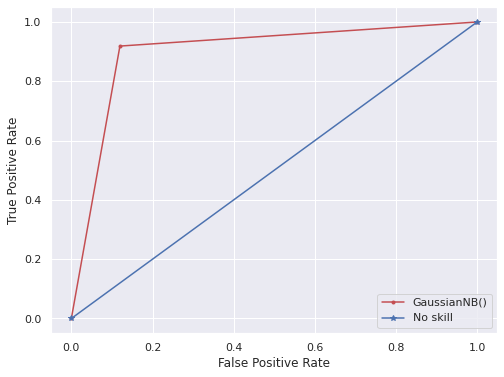

In [47]:
from sklearn.naive_bayes import GaussianNB
model_selection(GaussianNB(),features_train,target_train,features_test,target_test)

**We got Training Accuracy as 93.13% and Testing Accuracy as 88.57%**